# Imports

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

np.random.seed(123)

# Exercises I

## 3

In [146]:
from env import host, user, password

In [147]:
def get_db_url(user,host,password,dbname):
	url = f'mysql+pymysql://{user}:{password}@{host}/{dbname}'
	return url


In [148]:
# from env import get_db_url

In [149]:

# dbname='employees'
# get_db_url(dbname)

## 4

In [150]:
dbname='employees'
url=get_db_url(user,host,password,dbname)

In [151]:
pd.read_sql('''SELECT * FROM employees LIMIT 5 OFFSET 50''', url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


## 5

### a

In [152]:
dbname='employes'
url=get_db_url(user,host,password,dbname)

In [153]:
# pd.read_sql('''SELECT * FROM employees LIMIT 5 OFFSET 50''', url)

OperationalError: (pymysql.err.OperationalError) (1044, "Access denied for user 'innis_1652'@'%' to database 'employes'")
(Background on this error at: https://sqlalche.me/e/14/e3q8)

### b

In [154]:
# pd.read_sql('SELECT * FROM employees LIMT 5 OFFSET 50', url)

(pymysql.err.OperationalError) (1044, "Access denied for user 'innis_1652'@'%' to database 'employes'")
(Background on this error at: https://sqlalche.me/e/14/e3q8)

## 6

In [155]:
dbname='employees'
url=get_db_url(user,host,password,dbname)
employees=pd.read_sql('SELECT * FROM employees', url)

cache

In [156]:
# employees.to_csv('employees.csv')

In [157]:
# employees = pd.read_csv('employees.csv', index_col=0)
# employees

In [158]:
dbname='employees'
url=get_db_url(user,host,password,dbname)
titles=pd.read_sql('SELECT * FROM titles', url)

cache

In [159]:
# titles.to_csv('titles.csv')

In [160]:
# titles = pd.read_csv('titles.csv', index_col=0)
# titles

## 7

In [161]:
employees.shape

(300024, 6)

In [162]:
titles.shape

(443308, 4)

## 8

In [163]:
employees.describe()

,emp_no
count,300024.000000
mean,253321.763392
std,161828.235540
min,10001.000000
25%,85006.750000
50%,249987.500000
75%,424993.250000
max,499999.000000


In [164]:
titles.describe()

,emp_no
count,443308.000000
mean,253075.034430
std,161853.292613
min,10001.000000
25%,84855.750000
50%,249847.500000
75%,424891.250000
max,499999.000000



## 9

In [165]:
titles.title.value_counts()

Engineer              115003
Staff                 107391
Senior Engineer        97750
Senior Staff           92853
Technique Leader       15159
Assistant Engineer     15128
Manager                   24
Name: title, dtype: int64

In [166]:
titles.title.unique()

array(['Senior Engineer', 'Staff', 'Engineer', 'Senior Staff',
       'Assistant Engineer', 'Technique Leader', 'Manager'], dtype=object)

## 10

In [167]:
str(titles['to_date'].min())

'1985-03-01'

## 11

In [168]:
dbname='employees'
url=get_db_url(user,host,password,dbname)

In [169]:
new_titles = pd.read_sql('''SELECT * FROM titles WHERE to_date <=NOW()''', url)
new_titles.sort_values(by='to_date')['to_date'].tail(1)

167151    2002-08-01
Name: to_date, dtype: object

# Indexing and Subsetting

In [170]:
# Create list of values for names column.

students = ['Sally', 'Jane', 'Suzie', 'Billy', 'Ada', 'John', 'Thomas',
            'Marie', 'Albert', 'Richard', 'Isaac', 'Alan']

# Randomly generate arrays of scores for each student for each subject.
# Note that all the values need to have the same length here.

math_grades = np.random.randint(low=60, high=100, size=len(students))
english_grades = np.random.randint(low=60, high=100, size=len(students))
reading_grades = np.random.randint(low=60, high=100, size=len(students))


In [171]:
# Construct the DataFrame using the above lists and arrays.

df = pd.DataFrame({'name': students,
                   'math': math_grades,
                   'english': english_grades,
                   'reading': reading_grades,
                   'classroom': np.random.choice(['A', 'B'], len(students))})


In [172]:
df[['name', 'classroom']]

,name,classroom
0,Sally,A
1,Jane,B
2,Suzie,A
3,Billy,B
4,Ada,A
5,John,B
6,Thomas,A
7,Marie,A
8,Albert,A
9,Richard,A


In [173]:
type(df[['name', 'classroom']])

pandas.core.frame.DataFrame

In [174]:
df['name']

0       Sally
1        Jane
2       Suzie
3       Billy
4         Ada
5        John
6      Thomas
7       Marie
8      Albert
9     Richard
10      Isaac
11       Alan
Name: name, dtype: object

In [175]:
type(df['name'])

pandas.core.series.Series

In [176]:
bools = df.name.str.startswith('A')
bools


0     False
1     False
2     False
3     False
4      True
5     False
6     False
7     False
8      True
9     False
10    False
11     True
Name: name, dtype: bool

In [177]:
df[bools]

,name,math,english,reading,classroom
4,Ada,77,92,98,A
8,Albert,92,62,87,A
11,Alan,92,62,72,A



## .loc

In [178]:
df.loc[:, 'math':'reading']


,math,english,reading
0,62,85,80
1,88,79,67
2,94,74,95
3,98,96,88
4,77,92,98
5,79,76,93
6,82,64,81
7,93,63,90
8,92,62,87
9,69,80,94


In [179]:
df.loc[bools, 'name': 'reading']

,name,math,english,reading
4,Ada,77,92,98
8,Albert,92,62,87
11,Alan,92,62,72


## .iloc

In [180]:
df.iloc[:3]

,name,math,english,reading,classroom
0,Sally,62,85,80,A
1,Jane,88,79,67,B
2,Suzie,94,74,95,A


In [181]:
df.iloc[:3, 1:3]

,math,english
0,62,85
1,88,79
2,94,74


# Aggregating

## .agg

In [182]:
df.reading.agg('min')

67

In [183]:
df[['english', 'reading', 'math']].agg(['mean', 'min', 'max'])

,english,reading,math
mean,77.666667,86.5,84.833333
min,62.000000,67.0,62.000000
max,99.000000,98.0,98.000000


## .groupby

In [184]:
df.groupby('classroom').math.max()

classroom
A    94
B    98
Name: math, dtype: int64

In [185]:
df.groupby('classroom').math.agg(['min', 'mean', 'max'])

,min,mean,max
classroom,,,
A,62,82.625,94
B,79,89.250,98


## np.where

In [186]:
df['passing_math'] = np.where(df.math < 70, 'failing', 'passing')
df


,name,math,english,reading,classroom,passing_math
0,Sally,62,85,80,A,failing
1,Jane,88,79,67,B,passing
2,Suzie,94,74,95,A,passing
3,Billy,98,96,88,B,passing
4,Ada,77,92,98,A,passing
5,John,79,76,93,B,passing
6,Thomas,82,64,81,A,passing
7,Marie,93,63,90,A,passing
8,Albert,92,62,87,A,passing
9,Richard,69,80,94,A,failing


In [187]:
grade_groups = df.groupby(['passing_math', 'classroom']).reading.agg(['mean', 'count'])
grade_groups

mean  count
passing_math classroom                  
failing      A          87.000000      2
passing      A          87.166667      6
             B          85.250000      4

In [188]:
grade_groups.columns = ['avg_reading_grade', 'count_of_students']
grade_groups

avg_reading_grade  count_of_students
passing_math classroom                                      
failing      A                  87.000000                  2
passing      A                  87.166667                  6
             B                  85.250000                  4

## .transform

In [189]:
df.assign(avg_math_score_by_classroom=df.groupby('classroom').math.transform('mean'))

,name,math,english,reading,classroom,passing_math,avg_math_score_by_classroom
0,Sally,62,85,80,A,failing,82.625
1,Jane,88,79,67,B,passing,89.250
2,Suzie,94,74,95,A,passing,82.625
3,Billy,98,96,88,B,passing,89.250
4,Ada,77,92,98,A,passing,82.625
5,John,79,76,93,B,passing,89.250
6,Thomas,82,64,81,A,passing,82.625
7,Marie,93,63,90,A,passing,82.625
8,Albert,92,62,87,A,passing,82.625
9,Richard,69,80,94,A,failing,82.625


## .describe

In [190]:
df.groupby('classroom').reading.describe()

,count,mean,std,min,25%,50%,75%,max
classroom,,,,,,,,
A,8.0,87.125,8.887190,72.0,80.75,88.5,94.25,98.0
B,4.0,85.250,12.392874,67.0,82.75,90.5,93.00,93.0


# Merging and Joining

## pd.concat

In [191]:
df1 = pd.DataFrame({'a': [1, 2, 3]})
df2 = pd.DataFrame({'a': [4, 5, 6]})

In [192]:
df1

,a
0,1
1,2
2,3


In [193]:
df2

,a
0,4
1,5
2,6


In [194]:
df3=pd.concat([df1, df2])

In [195]:
df3

,a
0,1
1,2
2,3
0,4
1,5
2,6


In [196]:
df3.iloc[3]

a    4
Name: 0, dtype: int64

In [197]:
concat_df1 = pd.concat([df1, df2], ignore_index=True)
concat_df1

,a
0,1
1,2
2,3
3,4
4,5
5,6


In [198]:
concat_df2 = pd.DataFrame({'b': [1, 2, 3, 4, 5, 6]})
concat_df2

,b
0,1
1,2
2,3
3,4
4,5
5,6


In [199]:
pd.concat([concat_df1, concat_df2], axis=1)

,a,b
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5
5,6,6


## .merge

### df.merge default settings for commonly used parameters.

left_df.merge(right_df, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, indicator=False)


In [200]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [201]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [202]:
users.merge(roles, left_on='role_id', right_on='id', how='outer', indicator=True)

,id_x,name_x,role_id,id_y,name_y,_merge
0,1.0,bob,1.0,1.0,admin,both
1,2.0,joe,2.0,2.0,author,both
2,3.0,sally,3.0,3.0,reviewer,both
3,4.0,adam,3.0,3.0,reviewer,both
4,5.0,jane,NaN,NaN,NaN,left_only
5,6.0,mike,NaN,NaN,NaN,left_only
6,NaN,NaN,NaN,4.0,commenter,right_only


In [203]:
(users.merge(roles, 
            left_on='role_id', 
            right_on='id', 
            how='outer')
    .drop(columns='role_id')
    .rename(columns={'id_x': 'id', 
                     'name_x': 'employee',
                     'id_y': 'role_id',
                     'name_y': 'role'}
            )
)


,id,employee,role_id,role
0,1.0,bob,1.0,admin
1,2.0,joe,2.0,author
2,3.0,sally,3.0,reviewer
3,4.0,adam,3.0,reviewer
4,5.0,jane,NaN,NaN
5,6.0,mike,NaN,NaN
6,NaN,NaN,4.0,commenter


# Exercises II

## 1

In [204]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [205]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


## 2

In [206]:
users.merge(roles,how='right', indicator=True)

,id,name,role_id,_merge
0,1,admin,NaN,right_only
1,2,author,NaN,right_only
2,3,reviewer,NaN,right_only
3,4,commenter,NaN,right_only


## 3

In [207]:
users.merge(roles,how='outer', indicator=True)

,id,name,role_id,_merge
0,1,bob,1.0,left_only
1,2,joe,2.0,left_only
2,3,sally,3.0,left_only
3,4,adam,3.0,left_only
4,5,jane,NaN,left_only
5,6,mike,NaN,left_only
6,1,admin,NaN,right_only
7,2,author,NaN,right_only
8,3,reviewer,NaN,right_only
9,4,commenter,NaN,right_only


## 4

In [208]:
users.drop(columns='id').merge(roles.drop(columns='id'),how='outer', left_index=True, right_index=True, indicator=True)

,name_x,role_id,name_y,_merge
0,bob,1.0,admin,both
1,joe,2.0,author,both
2,sally,3.0,reviewer,both
3,adam,3.0,commenter,both
4,jane,NaN,NaN,left_only
5,mike,NaN,NaN,left_only


In [209]:
users.merge(roles,how='outer', left_index=True, right_index=True, indicator=True)

,id_x,name_x,role_id,id_y,name_y,_merge
0,1,bob,1.0,1.0,admin,both
1,2,joe,2.0,2.0,author,both
2,3,sally,3.0,3.0,reviewer,both
3,4,adam,3.0,4.0,commenter,both
4,5,jane,NaN,NaN,NaN,left_only
5,6,mike,NaN,NaN,NaN,left_only


In [210]:
users.drop(columns='id').merge(roles.drop(columns='id'),how='outer', indicator=True)

,name,role_id,_merge
0,bob,1.0,left_only
1,joe,2.0,left_only
2,sally,3.0,left_only
3,adam,3.0,left_only
4,jane,NaN,left_only
5,mike,NaN,left_only
6,admin,NaN,right_only
7,author,NaN,right_only
8,reviewer,NaN,right_only
9,commenter,NaN,right_only


## 5

In [211]:
mpg = data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


## 6

In [212]:
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




## 7

In [213]:
mpg.shape

(234, 11)

## 8

In [214]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [215]:
mpg.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

In [216]:
mpg.columns.tolist()

['manufacturer',
 'model',
 'displ',
 'year',
 'cyl',
 'trans',
 'drv',
 'cty',
 'hwy',
 'fl',
 'class']

## 9

In [217]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [218]:
mpg.describe(exclude=np.number)

,manufacturer,model,trans,drv,fl,class
count,234,234,234,234,234,234
unique,15,38,10,3,5,7
top,dodge,caravan 2wd,auto(l4),f,r,suv
freq,37,11,83,106,168,62


## 10

In [219]:
mpg.manufacturer.unique().size

15

In [220]:
mpg.manufacturer.nunique()

15

## 11

In [221]:
mpg.model.unique().size

38

In [222]:
mpg.model.nunique()

38

## 12

In [223]:
mpg['mileage_difference']=mpg.hwy-mpg.cty
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mileage_difference
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8


## 13

In [224]:
mpg['average_mileage'] = mpg[['cty', 'hwy']].mean(axis=1)
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mileage_difference,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8,22.0


## 14

In [225]:
mpg['is_automatic']=mpg.trans.str.contains('auto')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mileage_difference,average_mileage,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9,23.5,True
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8,25.0,False
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10,21.0,True
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8,22.0,False


In [226]:
mpg.trans.str.startswith('a')

1       True
2      False
3      False
4       True
5       True
       ...  
230     True
231    False
232     True
233    False
234     True
Name: trans, Length: 234, dtype: bool

## 15

In [227]:
mpg.groupby('manufacturer').average_mileage.mean().idxmax()

'honda'

In [228]:
mpg.groupby('manufacturer').average_mileage.mean().nsmallest()

manufacturer
land rover    14.000000
lincoln       14.166667
dodge         15.540541
jeep          15.562500
mercury       15.625000
Name: average_mileage, dtype: float64

In [229]:
mpg.groupby('manufacturer').displ.mean().idxmax()

'lincoln'

In [230]:
multi_models = mpg.groupby(
	['manufacturer', 'model'])[['hwy']].agg(
		['mean', 'count']).sort_values(
			by=('hwy', 'mean'), ascending=False)
multi_models

hwy      
                                          mean count
manufacturer model                                  
toyota       corolla                 34.000000     5
volkswagen   new beetle              32.833333     6
honda        civic                   32.555556     9
volkswagen   jetta                   29.111111     9
nissan       altima                  28.666667     6
audi         a4                      28.285714     7
toyota       camry                   28.285714     7
             camry solara            28.142857     7
hyundai      sonata                  27.714286     7
chevrolet    malibu                  27.600000     5
volkswagen   passat                  27.571429     7
             gti                     27.400000     5
pontiac      grand prix              26.400000     5
subaru       impreza awd             26.000000     8
hyundai      tiburon                 26.000000     7
audi         a4 quattro              25.750000     8
nissan       maxima                  25.333333     3
subaru       forester awd            25.000000     6
chevrolet    corvette                24.800000     5
audi         a6 quattro              24.000000     3
ford         mustang                 23.222222     9
dodge        caravan 2wd             22.363636    11
toyota       toyota tacoma 4wd       19.428571     7
             4runner 4wd             18.833333     6
ford         explorer 4wd            18.000000     6
mercury      mountaineer 4wd         18.000000     4
nissan       pathfinder 4wd          18.000000     4
chevrolet    c1500 suburban 2wd      17.800000     5
jeep         grand cherokee 4wd      17.625000     8
ford         expedition 2wd          17.333333     3
dodge        dakota pickup 4wd       17.000000     9
lincoln      navigator 2wd           17.000000     3
toyota       land cruiser wagon 4wd  16.500000     2
land rover   range rover             16.500000     4
ford         f150 pickup 4wd         16.428571     7
chevrolet    k1500 tahoe 4wd         16.250000     4
dodge        durango 4wd             16.000000     7
             ram 1500 pickup 4wd     15.300000    10

## 16

In [231]:
mpg.groupby('is_automatic').average_mileage.mean()

is_automatic
False    22.227273
True     19.130573
Name: average_mileage, dtype: float64

In [232]:
mpg.groupby('is_automatic').average_mileage.agg('mean')

is_automatic
False    22.227273
True     19.130573
Name: average_mileage, dtype: float64

# Reshaping

## pd.crosstab

In [233]:
# Construct the DataFrame using the above lists and arrays.

df = pd.DataFrame({'name': students,
                   'math': math_grades,
                   'english': english_grades,
                   'reading': reading_grades,
                   'classroom': np.random.choice(['A', 'B'], len(students))})

df['passing_math'] = np.where(df.math < 70, 'failing', 'passing')

df

,name,math,english,reading,classroom,passing_math
0,Sally,62,85,80,A,failing
1,Jane,88,79,67,B,passing
2,Suzie,94,74,95,B,passing
3,Billy,98,96,88,B,passing
4,Ada,77,92,98,B,passing
5,John,79,76,93,A,passing
6,Thomas,82,64,81,A,passing
7,Marie,93,63,90,A,passing
8,Albert,92,62,87,A,passing
9,Richard,69,80,94,B,failing


In [234]:
pd.crosstab(df.passing_math, df.classroom)

classroom,A,B
passing_math,,
failing,1,1
passing,5,5


In [235]:
pd.crosstab(df.passing_math, df.classroom, margins=True)

classroom,A,B,All
passing_math,,,
failing,1,1,2
passing,5,5,10
All,6,6,12


In [236]:
pd.crosstab(df.passing_math, df.classroom, normalize=True).round(3)

classroom,A,B
passing_math,,
failing,0.083,0.083
passing,0.417,0.417


## .pivot_table

In [237]:
df.pivot_table(index='classroom', columns='passing_math', values='math')


passing_math,failing,passing
classroom,,
A,62.0,87.6
B,69.0,89.8


## .map

In [238]:
n = 40

orders = pd.DataFrame({
    'drink': np.random.choice(['Tea', 'Water', 'Water'], n),
    'meal': np.random.choice(['Curry', 'Yakisoba Noodle', 'Pad Thai'], n),
})


orders.sample(10)


,drink,meal
0,Tea,Yakisoba Noodle
4,Water,Yakisoba Noodle
22,Water,Pad Thai
16,Water,Curry
11,Tea,Pad Thai
19,Water,Curry
32,Water,Yakisoba Noodle
18,Water,Yakisoba Noodle
26,Water,Pad Thai
21,Tea,Yakisoba Noodle


In [239]:
prices = {
    'Yakisoba Noodle': 9,
    'Curry': 11,
    'Pad Thai': 10,
    'Tea': 2,
    'Water': 0,
}

In [240]:
orders['bill'] = orders.drink.map(prices) + orders.meal.map(prices)

orders.sample(10)

,drink,meal,bill
6,Water,Curry,11
32,Water,Yakisoba Noodle,9
7,Water,Yakisoba Noodle,9
30,Water,Curry,11
0,Tea,Yakisoba Noodle,11
22,Water,Pad Thai,10
18,Water,Yakisoba Noodle,9
15,Water,Yakisoba Noodle,9
21,Tea,Yakisoba Noodle,11
33,Water,Curry,11


In [241]:
pd.crosstab(orders.drink, orders.meal)

meal,Curry,Pad Thai,Yakisoba Noodle
drink,,,
Tea,3,3,4
Water,14,6,10


In [242]:
pd.crosstab(orders.drink, orders.meal, normalize=True, margins=True)

meal,Curry,Pad Thai,Yakisoba Noodle,All
drink,,,,
Tea,0.075,0.075,0.10,0.25
Water,0.350,0.150,0.25,0.75
All,0.425,0.225,0.35,1.00


In [243]:
orders.pivot_table(index='drink', columns='meal', values='bill')

meal,Curry,Pad Thai,Yakisoba Noodle
drink,,,
Tea,13,12,11
Water,11,10,9


In [244]:
orders.groupby(['drink', 'meal']).bill.mean()

drink  meal           
Tea    Curry              13.0
       Pad Thai           12.0
       Yakisoba Noodle    11.0
Water  Curry              11.0
       Pad Thai           10.0
       Yakisoba Noodle     9.0
Name: bill, dtype: float64

In [245]:
orders.groupby([ 'meal','drink']).bill.mean()


meal             drink
Curry            Tea      13.0
                 Water    11.0
Pad Thai         Tea      12.0
                 Water    10.0
Yakisoba Noodle  Tea      11.0
                 Water     9.0
Name: bill, dtype: float64

# Transposing

## df.T

In [246]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11
name,Sally,Jane,Suzie,Billy,Ada,John,Thomas,Marie,Albert,Richard,Isaac,Alan
math,62,88,94,98,77,79,82,93,92,69,92,92
english,85,79,74,96,92,76,64,63,62,80,99,62
reading,80,67,95,88,98,93,81,90,87,94,93,72
classroom,A,B,B,B,B,A,A,A,A,B,B,A
passing_math,failing,passing,passing,passing,passing,passing,passing,passing,passing,failing,passing,passing


In [247]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math,12.0,84.833333,11.134168,62.0,78.50,90.0,92.25,98.0
english,12.0,77.666667,13.371158,62.0,63.75,77.5,86.75,99.0
reading,12.0,86.500000,9.643651,67.0,80.75,89.0,93.25,98.0


# Exercises III

## 1

In [248]:
dbname='chipotle'
url=get_db_url(user,host,password,dbname)
chipotle=pd.read_sql('SELECT * FROM orders', url)

In [249]:
type(chipotle)

pandas.core.frame.DataFrame

In [250]:
chipotle.sample(7)

,id,order_id,quantity,item_name,choice_description,item_price
2774,2775,1101,1,Canned Soda,[Sprite],$1.09
4172,4173,1665,1,Chips,nan,$2.15
4266,4267,1701,1,Chips,nan,$2.15
1420,1421,576,1,Barbacoa Bowl,[Roasted Chili Corn Salsa],$9.25
3276,3277,1313,1,Barbacoa Burrito,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",$11.48
3643,3644,1456,1,Steak Burrito,"[Tomatillo Green Chili Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Gua...",$11.75
1668,1669,675,1,Carnitas Soft Tacos,"[Tomatillo Red Chili Salsa, [Rice, Cheese, Sour Cream, Lettuce]]",$9.25


## 2

In [251]:
chipotle['item_price'] = chipotle.item_price.str.replace('$', '').astype(float)
chipotle.head() 

/var/folders/mk/w2hz4wxx7xn5hr_56wz536gh0000gn/T/ipykernel_6794/3550480532.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipotle['item_price'] = chipotle.item_price.str.replace('$', '').astype(float)


,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98


In [252]:
chipotle['chip_otal']=chipotle['quantity']*chipotle['item_price']
chipotle.head()

,id,order_id,quantity,item_name,choice_description,item_price,chip_otal
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39,2.39
1,2,1,1,Izze,[Clementine],3.39,3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98,33.96


## 3

In [253]:
top_three=chipotle.groupby('item_name').quantity.sum().sort_values(ascending=False).head(3)
top_three

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Name: quantity, dtype: int64

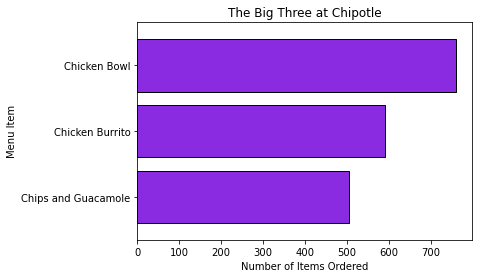

In [254]:
top_three.plot(kind='barh',
             color='blueviolet', 
             ec='black', 
             width=.8)

plt.title('The Big Three at Chipotle')
plt.xlabel('Number of Items Ordered')
plt.ylabel('Menu Item')

# reorder y-axis of horizontal bar chart
plt.gca().invert_yaxis()

plt.show()

## 4

In [255]:
chipotle.groupby('item_name').chip_otal.sum().nlargest(3)

item_name
Chicken Bowl       8044.63
Chicken Burrito    6387.06
Steak Burrito      4236.13
Name: chip_otal, dtype: float64

In [256]:
chipotle.groupby('item_name').chip_otal.sum().sort_values(ascending=False).head(3)

item_name
Chicken Bowl       8044.63
Chicken Burrito    6387.06
Steak Burrito      4236.13
Name: chip_otal, dtype: float64

## 5

In [257]:
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [258]:
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [259]:
# left_df.merge(right_df, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, indicator=False)

In [260]:
emp_titles=employees.merge(titles, how='left', on='emp_no', indicator=True)
emp_titles.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date,_merge
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01,both
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01,both
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01,both
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01,both
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01,both


## 6

In [261]:
dbname='employees'
url=get_db_url(user,host,password,dbname)

In [262]:
newer_titles = pd.read_sql('''SELECT * FROM employees WHERE hire_date <=NOW()''', url)


In [263]:
newer_titles.sort_values('hire_date',ascending=False).head(3)

,emp_no,birth_date,first_name,last_name,gender,hire_date
263831,463807,1964-06-12,Bikash,Covnot,M,2000-01-28
228401,428377,1957-05-09,Yucai,Gerlach,M,2000-01-23
299577,499553,1954-05-06,Hideyuki,Delgrande,F,2000-01-22


## 7

Total brain fart on this one. Thanks Madeleine and Chris for the aid.

In [264]:
dept_title_query = '''

                    SELECT t.emp_no, 
                    t.title, 
                    t.from_date, 
                    t.to_date, 
                    d.dept_name 
                    FROM departments AS d 
                    JOIN dept_emp AS de USING(dept_no) 
                    JOIN titles AS t USING(emp_no);

                    '''

In [265]:
# Code that reads in my data from the database.

dept_titles = pd.read_sql(dept_title_query, get_db_url(user,host,password,'employees'))
dept_titles.head()

,emp_no,title,from_date,to_date,dept_name
0,10011,Staff,1990-01-22,1996-11-09,Customer Service
1,10038,Senior Staff,1996-09-20,9999-01-01,Customer Service
2,10038,Staff,1989-09-20,1996-09-20,Customer Service
3,10049,Senior Staff,2000-05-04,9999-01-01,Customer Service
4,10049,Staff,1992-05-04,2000-05-04,Customer Service


In [266]:
dept_titles.shape

(489903, 5)

In [267]:
all_titles_crosstab = pd.crosstab(dept_titles.dept_name, dept_titles.title)
all_titles_crosstab

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,298,2362,4,2027,13925,16150,309
Development,7769,58135,2,49326,1247,1424,7683
Finance,0,0,2,0,12139,13929,0
Human Resources,0,0,2,0,12274,14342,0
Marketing,0,0,2,0,13940,16196,0
Production,6445,49649,4,42205,1270,1478,6557
Quality Management,1831,13852,4,11864,0,0,1795
Research,378,2986,2,2570,11637,13495,393
Sales,0,0,2,0,36191,41808,0


In [268]:
current_titles = dept_titles[dept_titles.to_date == dept_titles.to_date.max()]
current_titles.head(1)

,emp_no,title,from_date,to_date,dept_name
1,10038,Senior Staff,1996-09-20,9999-01-01,Customer Service


In [269]:
current_titles.shape

(265332, 5)

In [270]:
# Create a frequency table of titles by department

current_titles_crosstab = pd.crosstab(current_titles.dept_name, current_titles.title)
current_titles_crosstab

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,68,627,1,1790,12349,3902,241
Development,1833,15677,1,43364,1085,315,6117
Finance,0,0,1,0,10650,3199,0
Human Resources,0,0,1,0,10843,3416,0
Marketing,0,0,1,0,12371,3880,0
Production,1542,13325,1,37156,1123,349,5210
Quality Management,433,3744,1,10390,0,0,1422
Research,77,830,1,2250,10219,3206,321
Sales,0,0,1,0,32032,9967,0


In [271]:
current_titles_crosstab.style.highlight_max(axis=1)


title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,68,627,1,1790,12349,3902,241
Development,1833,15677,1,43364,1085,315,6117
Finance,0,0,1,0,10650,3199,0
Human Resources,0,0,1,0,10843,3416,0
Marketing,0,0,1,0,12371,3880,0
Production,1542,13325,1,37156,1123,349,5210
Quality Management,433,3744,1,10390,0,0,1422
Research,77,830,1,2250,10219,3206,321
Sales,0,0,1,0,32032,9967,0
